In [0]:
import pandas as pd
import numpy as np

In [0]:
df_inflation = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')
df_current_us_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_936013.csv')
df_constant_gdp = pd.read_csv('API_NY.GDP.PCAP.KD_DS2_en_csv_v2_935918.csv')

In [0]:
df_inflation.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)

## Feature engineering

In [0]:
df_inflation.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
df_current_us_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
df_constant_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

#### Shape of inflation, current US gdp, Constant gdp

In [81]:
df_inflation.shape, df_current_us_gdp.shape, df_constant_gdp.shape

((179, 243), (264, 61), (264, 61))

In [82]:
df_current_us_gdp.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN


In [83]:
df_constant_gdp.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15669.61604,18427.61153,22134.017271,24837.950958,25357.786944,26329.313141,26401.96874,26663.20776,27272.310041,26705.180996,26087.775812,27190.501182,27151.924104,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN


#### Remove columns prior to 1999

In [0]:
cols_to_remove = []
for col in df_current_us_gdp.columns:
  if col != 'Country Name' and int(col) < 1999:
    cols_to_remove.append(col)

In [0]:
df_current_us_gdp.drop(columns=cols_to_remove, inplace=True)

In [0]:
cols_to_remove = []
for col in df_constant_gdp.columns:
  if col != 'Country Name' and int(col) < 1999:
    cols_to_remove.append(col)

In [0]:
df_constant_gdp.drop(columns=cols_to_remove, inplace=True)

In [88]:
df_current_us_gdp.head(1)

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN


In [89]:
df_constant_gdp.head(1)

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN


#### Remove rows with no values

In [90]:
Indexes = df_current_us_gdp[df_current_us_gdp.isnull().sum(axis = 1) == len(df_current_us_gdp.columns) - 1].index
len(Indexes)

6

In [91]:
df_current_us_gdp.iloc[Indexes, :]

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
82,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_current_us_gdp.iloc[Indexes, :]['Country Name'].values

array(['Gibraltar', 'Not classified', 'St. Martin (French part)',
       'Korea, Dem. People’s Rep.', 'Sint Maarten (Dutch part)',
       'British Virgin Islands'], dtype=object)

In [0]:
df_current_us_gdp.drop(Indexes , inplace=True)

In [94]:
df_current_us_gdp.shape

(258, 22)

In [95]:
Indexes = df_constant_gdp[df_constant_gdp.isnull().sum(axis = 1) == len(df_constant_gdp.columns) - 1].index
len(Indexes)

12

In [96]:
df_constant_gdp.iloc[Indexes, :]

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
36,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,New Caledonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_constant_gdp.iloc[Indexes, :]['Country Name'].values

array(['Channel Islands', 'Curacao', 'Gibraltar', 'Not classified',
       'St. Martin (French part)', 'New Caledonia',
       'Korea, Dem. People’s Rep.', 'French Polynesia', 'Somalia',
       'Sint Maarten (Dutch part)', 'Syrian Arab Republic',
       'British Virgin Islands'], dtype=object)

In [0]:
df_constant_gdp.drop(Indexes , inplace=True)

In [99]:
df_constant_gdp.shape

(252, 22)

In [0]:
df_inflation.set_index('Country Name', inplace=True)
df_constant_gdp.set_index('Country Name', inplace=True)
df_current_us_gdp.set_index('Country Name', inplace=True)

#### Imputing Inflation missing values

In [101]:
bool_nan_values = np.isnan(df_inflation.values)
indices_of_nan_values_inflation = np.argwhere(bool_nan_values == True)
indices_of_nan_values_inflation

array([[  0, 241],
       [  1, 241],
       [  2,   0],
       ...,
       [178, 239],
       [178, 240],
       [178, 241]])

In [102]:
imputed_values_inflation = np.load('brits_i_data_inflation.npy')
imputed_values_inflation

array([[[-3.04376870e-01],
        [-2.17708975e-01],
        [ 1.58898644e-02],
        ...,
        [-2.39741616e-03],
        [-5.91961145e-01],
        [-1.12172149e-01]],

       [[ 3.73853222e-02],
        [ 1.00692827e-02],
        [-2.08433364e-02],
        ...,
        [ 4.97962087e-02],
        [ 6.65249676e-02],
        [ 9.11914110e-02]],

       [[ 1.02912998e+00],
        [ 7.65874207e-01],
        [ 1.33488905e+00],
        ...,
        [-2.08545893e-01],
        [ 1.26261115e-01],
        [ 3.52789722e-02]],

       ...,

       [[-1.55994575e-03],
        [ 3.42885405e-03],
        [-6.79206848e-03],
        ...,
        [-1.49915472e-01],
        [-1.24986544e-01],
        [-9.39147323e-02]],

       [[ 8.64175707e-03],
        [ 6.97245449e-03],
        [ 1.32757053e-03],
        ...,
        [-1.12314187e-01],
        [-8.54979530e-02],
        [-5.39881960e-02]],

       [[ 2.21659482e-01],
        [ 4.83236074e-01],
        [ 6.57515466e-01],
        ...,
        

In [0]:
inflation_mean, inflation_std = df_inflation.stack().mean(), df_inflation.stack().std()

In [0]:
new_df_inflation = df_inflation.copy()
for i in range(len(indices_of_nan_values_inflation)):
  ind = tuple(indices_of_nan_values_inflation[i])
  new_df_inflation.iat[ind] = imputed_values_inflation[ind][0]*inflation_std + inflation_mean

In [105]:
new_df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099,0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530

In [106]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
"Tajikistan, Rep. of",NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0

#### Imputing missing values of current gdp

In [107]:
bool_nan_values = np.isnan(df_current_us_gdp.values)
indices_of_nan_values_current_us_gdp = np.argwhere(bool_nan_values == True)
indices_of_nan_values_current_us_gdp

array([[  0,  19],
       [  0,  20],
       [  1,   0],
       [  1,   1],
       [  1,   2],
       [  1,  20],
       [  2,  20],
       [  3,  20],
       [  4,  20],
       [  5,  20],
       [  6,  20],
       [  7,  20],
       [  8,  20],
       [  9,   0],
       [  9,   1],
       [  9,   2],
       [  9,  20],
       [ 10,  20],
       [ 11,  20],
       [ 12,  20],
       [ 13,  20],
       [ 14,  20],
       [ 15,  20],
       [ 16,  20],
       [ 17,  20],
       [ 18,  20],
       [ 19,  20],
       [ 20,  20],
       [ 21,  20],
       [ 22,  20],
       [ 23,  20],
       [ 24,  20],
       [ 25,  15],
       [ 25,  16],
       [ 25,  17],
       [ 25,  18],
       [ 25,  19],
       [ 25,  20],
       [ 26,  20],
       [ 27,  20],
       [ 28,  20],
       [ 29,  20],
       [ 30,  20],
       [ 31,  20],
       [ 32,  20],
       [ 33,  20],
       [ 34,  20],
       [ 35,  20],
       [ 36,   9],
       [ 36,  10],
       [ 36,  11],
       [ 36,  12],
       [ 36,

In [108]:
imputed_values_current_gdp = np.load('brits_i_data_current_gdp.npy')
imputed_values_current_gdp

array([[[-0.27372855],
        [-0.2737231 ],
        [-0.27372304],
        ...,
        [-0.27363586],
        [-0.27362737],
        [-0.17274384]],

       [[-0.20425066],
        [-0.2423707 ],
        [-0.2488819 ],
        ...,
        [-0.27089533],
        [-0.27101445],
        [-0.17070842]],

       [[-0.09686687],
        [-0.08803041],
        [-0.0855765 ],
        ...,
        [ 0.6636902 ],
        [ 0.68960834],
        [ 0.31504846]],

       ...,

       [[-0.2728976 ],
        [-0.27287215],
        [-0.2729019 ],
        ...,
        [-0.24154028],
        [-0.22415987],
        [-0.14882392]],

       [[-0.24743418],
        [-0.2449686 ],
        [-0.24485712],
        ...,
        [-0.13833414],
        [-0.13094456],
        [-0.0966679 ]],

       [[ 0.55439025],
        [ 0.62650853],
        [ 0.6382264 ],
        ...,
        [ 4.1555176 ],
        [ 4.426034  ],
        [ 2.0608685 ]]], dtype=float32)

In [0]:
current_mean_gdp, current_std_gdp = df_current_us_gdp.stack().mean(), df_current_us_gdp.stack().std()

In [0]:
new_df_current_us_gdp = df_current_us_gdp.copy()
for i in range(len(indices_of_nan_values_current_us_gdp)):
  ind = tuple(indices_of_nan_values_current_us_gdp[i])
  new_df_current_us_gdp.iat[ind] = imputed_values_current_gdp[ind][0]*current_std_gdp + current_mean_gdp

#### Current GDP

In [111]:
df_current_us_gdp.tail()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,NaN,1.849196e+09,2.535334e+09,2.406271e+09,2.790456e+09,3.556757e+09,3.663102e+09,3.846820e+09,4.655899e+09,5.687362e+09,5.653823e+09,5.830416e+09,6.692431e+09,6.499760e+09,7.071982e+09,7.386883e+09,6.440068e+09,6.714727e+09,7.227700e+09,7.938991e+09,NaN
"Yemen, Rep.",7.641103e+09,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10,NaN
South Africa,1.366323e+11,1.363613e+11,1.215147e+11,1.154824e+11,1.752569e+11,2.285900e+11,2.577727e+11,2.716385e+11,2.994155e+11,2.867698e+11,2.959365e+11,3.753494e+11,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,NaN
Zambia,3.404312e+09,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10,NaN
Zimbabwe,6.858013e+09,6.689958e+09,6.777385e+09,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.281301e+10,3.100052e+10,NaN


In [112]:
new_df_current_us_gdp.tail()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,9.797693e+10,1.849196e+09,2.535334e+09,2.406271e+09,2.790456e+09,3.556757e+09,3.663102e+09,3.846820e+09,4.655899e+09,5.687362e+09,5.653823e+09,5.830416e+09,6.692431e+09,6.499760e+09,7.071982e+09,7.386883e+09,6.440068e+09,6.714727e+09,7.227700e+09,7.938991e+09,9.920615e+11
"Yemen, Rep.",7.641103e+09,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10,7.064758e+11
South Africa,1.366323e+11,1.363613e+11,1.215147e+11,1.154824e+11,1.752569e+11,2.285900e+11,2.577727e+11,2.716385e+11,2.994155e+11,2.867698e+11,2.959365e+11,3.753494e+11,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,8.693979e+11
Zambia,3.404312e+09,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10,1.232228e+12
Zimbabwe,6.858013e+09,6.689958e+09,6.777385e+09,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.281301e+10,3.100052e+10,1.624142e+13


#### Imputing Constant US GDP value

In [113]:
bool_nan_values = np.isnan(df_constant_gdp.values)
indices_of_nan_values_constant_gdp = np.argwhere(bool_nan_values == True)
indices_of_nan_values_constant_gdp

array([[  0,  19],
       [  0,  20],
       [  1,   0],
       [  1,   1],
       [  1,   2],
       [  1,  20],
       [  2,  20],
       [  3,  20],
       [  4,  20],
       [  5,  20],
       [  6,  20],
       [  7,  20],
       [  8,  20],
       [  9,   0],
       [  9,   1],
       [  9,   2],
       [  9,  20],
       [ 10,  20],
       [ 11,  20],
       [ 12,  20],
       [ 13,  20],
       [ 14,  20],
       [ 15,  20],
       [ 16,  20],
       [ 17,  20],
       [ 18,  20],
       [ 19,  20],
       [ 20,  20],
       [ 21,  20],
       [ 22,  20],
       [ 23,  20],
       [ 24,  20],
       [ 25,  15],
       [ 25,  16],
       [ 25,  17],
       [ 25,  18],
       [ 25,  19],
       [ 25,  20],
       [ 26,  20],
       [ 27,  20],
       [ 28,  20],
       [ 29,  20],
       [ 30,  20],
       [ 31,  20],
       [ 32,  20],
       [ 33,  20],
       [ 34,  20],
       [ 35,  20],
       [ 36,  20],
       [ 37,  20],
       [ 38,  20],
       [ 39,  20],
       [ 40,

In [114]:
imputed_values_constant_gdp = np.load('brits_i_data_constant_gdp.npy')
imputed_values_constant_gdp

array([[[ 2.8716304 ],
        [ 3.166852  ],
        [ 3.3994777 ],
        ...,
        [ 1.1183068 ],
        [ 1.0476329 ],
        [ 1.0203525 ]],

       [[-0.63458335],
        [-0.6333263 ],
        [-0.6319701 ],
        ...,
        [-0.61339676],
        [-0.6125904 ],
        [-0.3218972 ]],

       [[-0.28514007],
        [-0.27367467],
        [-0.2711588 ],
        ...,
        [-0.15281947],
        [-0.14297883],
        [-0.08841898]],

       ...,

       [[-0.6117197 ],
        [-0.61130315],
        [-0.6101841 ],
        ...,
        [-0.5933261 ],
        [-0.5905887 ],
        [-0.3104533 ]],

       [[-0.2976054 ],
        [-0.5349736 ],
        [-0.5318792 ],
        ...,
        [-0.5328588 ],
        [-0.5339647 ],
        [-0.28211904]],

       [[-0.4398896 ],
        [-0.43257266],
        [-0.4338718 ],
        ...,
        [-0.35598263],
        [-0.27199754],
        [-0.18503124]]], dtype=float32)

In [0]:
const_mean_gdp, const_std_gdp = df_constant_gdp.stack().mean(), df_constant_gdp.stack().std()

In [0]:
new_df_constant_gdp = df_constant_gdp.copy()
for i in range(len(indices_of_nan_values_constant_gdp)):
  ind = tuple(indices_of_nan_values_constant_gdp[i])
  new_df_constant_gdp.iat[ind] = imputed_values_constant_gdp[ind][0] * const_std_gdp + const_mean_gdp

In [117]:
df_constant_gdp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN
Afghanistan,NaN,NaN,NaN,330.303553,343.080890,333.216684,357.234720,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,563.825663,NaN
Angola,2201.529460,2195.630582,2213.681162,2433.804393,2423.293995,2597.456995,2883.978211,3102.650928,3409.503462,3652.153498,3549.577857,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623,3530.309423,3409.929285,3229.619740,NaN
Albania,2085.432000,2244.631092,2453.631476,2572.728837,2725.179233,2887.378653,3062.682698,3263.911108,3485.332441,3775.592182,3928.461732,4094.362119,4209.886951,4276.620180,4327.392449,4413.309627,4524.386108,4681.840039,4865.209546,5079.401120,NaN
Andorra,40035.482449,40801.542130,41420.846178,42396.302398,45519.492384,47032.866888,48831.929360,49707.173015,48710.075502,43900.428212,41979.368881,39736.354063,38207.595907,38192.439890,39111.079528,40790.198011,41767.526508,42949.666237,43858.077514,44569.783009,NaN


In [118]:
new_df_constant_gdp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,35746.687080,35177.169537
Afghanistan,628.069479,654.312405,682.624653,330.303553,343.080890,333.216684,357.234720,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,563.825663,7155.830061
Angola,2201.529460,2195.630582,2213.681162,2433.804393,2423.293995,2597.456995,2883.978211,3102.650928,3409.503462,3652.153498,3549.577857,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623,3530.309423,3409.929285,3229.619740,12030.014704
Albania,2085.432000,2244.631092,2453.631476,2572.728837,2725.179233,2887.378653,3062.682698,3263.911108,3485.332441,3775.592182,3928.461732,4094.362119,4209.886951,4276.620180,4327.392449,4413.309627,4524.386108,4681.840039,4865.209546,5079.401120,7813.558180
Andorra,40035.482449,40801.542130,41420.846178,42396.302398,45519.492384,47032.866888,48831.929360,49707.173015,48710.075502,43900.428212,41979.368881,39736.354063,38207.595907,38192.439890,39111.079528,40790.198011,41767.526508,42949.666237,43858.077514,44569.783009,13827.250833


In [119]:
len(new_df_current_us_gdp.index)

258

#### So, there is no country in constant gdp which is not included in currrent us gdp

In [0]:
for col in new_df_constant_gdp.index:
  if not col in new_df_current_us_gdp.index:
    print('col is:', col)

#### Remove indices which are not in constant gdp

In [121]:
remove_ind = []
for ind in new_df_current_us_gdp.index:
  if not ind in new_df_constant_gdp.index:
    remove_ind.append(ind)
    print('col is:', ind)

col is: Channel Islands
col is: Curacao
col is: New Caledonia
col is: French Polynesia
col is: Somalia
col is: Syrian Arab Republic


#### Take the last two years as Test Set, others as Train Set

In [0]:
new_df_inflation.head()
col_list = new_df_inflation.columns

train_columns = col_list[:-24] #col_list[:int(0.8*(len(col_list)))]
test_columns = col_list[len(col_list) - 24:]  #col_list[int(0.8*(len(col_list))):]

test_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in test_columns]]
train_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in train_columns]]

In [123]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

In [124]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [0]:
new_df_current_us_gdp.drop(remove_ind , inplace=True)

In [0]:
# new_df_current_us_gdp, new_df_constant_gdp

import calendar
res_lst = []
new_set = set()

for ind, ls in train_data_inflation.iterrows():
  for i in range(len(ls)-12):
    values = ls[i:i+13].values.tolist()
    month_col = ls[i+12:i+13].index[0]
    str_month = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
    year = month_col[:month_col.find('M')]
    if ind in new_df_current_us_gdp.index:
      values.append(str_month)
      values.append(new_df_current_us_gdp.at[ind, str(int(year) - 1)])
      values.append(new_df_constant_gdp.at[ind, str(int(year) - 1)])
      res_lst.append(values)
    elif ',' in ind and ind.split(',')[0].strip() in new_df_current_us_gdp.index:
      test = ind.split(',')[0].strip()
      res = [i for i in new_df_current_us_gdp.index if test in i][0]
      values.append(str_month)
      values.append(new_df_current_us_gdp.at[res, str(int(year) - 1)])
      values.append(new_df_constant_gdp.at[res, str(int(year) - 1)])
      res_lst.append(values)
      # print('ind is:', ind.split(',')[0]).strip()
    else:
      #print(ind.split(',')[0].strip())
      new_set.add(ind)
      # print('else ind is:', ind)
      
    # values.append(str_month)
    # res_lst.append(values)

#print(new_set)

In [127]:
new_set

{'Central African Rep.',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Curaçao, Kingdom of the Netherlands',
 'Czech Rep.',
 "Côte d'Ivoire",
 'Dominican Rep.',
 'Egypt, Arab Rep. of',
 'Iran, Islamic Rep. of',
 'Korea, Rep. of',
 'Kyrgyz Rep.',
 "Lao People's Dem. Rep.",
 'Montserrat',
 'New Caledonia',
 'Sint Maarten, Kingdom of the Netherlands',
 'Slovak Rep.',
 'Syrian Arab Rep.',
 'São Tomé and Príncipe, Dem. Rep. of',
 'Venezuela, Rep. Bolivariana de',
 'Yemen, Rep. of'}

In [128]:
len(new_set)

20

In [0]:
df_ = pd.DataFrame(res_lst, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'target', 'month', 'current us gdp', 'constant us gdp'])

In [130]:
df_[df_.isnull().sum(axis=1) > 0].shape

(0, 16)

In [131]:
df_.shape

(32754, 16)

In [132]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,current us gdp,constant us gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,January,1.211347e+12,1767.833627
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,February,1.211347e+12,1767.833627
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,March,1.211347e+12,1767.833627
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,April,1.211347e+12,1767.833627
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,May,1.211347e+12,1767.833627


In [0]:
res_df = df_.copy()

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [135]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,current us gdp,constant us gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,4,1.211347e+12,1767.833627
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,3,1.211347e+12,1767.833627
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,7,1.211347e+12,1767.833627
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,0,1.211347e+12,1767.833627
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,8,1.211347e+12,1767.833627


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
for c in X.columns:
    col_type = X[c].dtype
    if c == 'month':
      X[c] = X[c].astype('category')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# X_train.shape, X.shape

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
import lightgbm as lgb
dtrain = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])


# def lgb_r2_score(preds, dtrain):
#     labels = dtrain.get_label()
#     return 'r2', r2_score(labels, preds), True


def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        global dtrain    
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l2'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=42, categorical_feature=['month'], stratified=False, verbose_eval =None, metrics=['l2'])
        #cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
       #                       verbose_eval =None, feval=lgb_r2_score) 
        #print('cv-result is:', cv_result.keys())     
        return -np.min(cv_result['l2-mean'])

# Domain space-- Range of hyperparameters
pds = {'num_leaves': (20, 90),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=35)

optimizer.max['params']

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        | -1.329    |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  57.69    |
|  2        | -1.366    |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  76.26    |
|  3        | -1.36     |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.65    |
|  4        | -1.417    |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  58.39    |
|  5        | -1.351    |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.74    |
|  6        | -1.363    |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  20.0     |
|  7        | -1.351    |  0.8      |  0.9      |  9.0      |  30.0     |  0.001    |  59.23    |
|  8        | -1.333    |  0.8      |  0.9      |  9.0      |  50.0     |  0.1      |  20.0     |
|  9        | -1.332

{'bagging_fraction': 0.8449747032569521,
 'feature_fraction': 0.740923311710956,
 'max_depth': 9.189594762667438,
 'min_child_weight': 49.866179171566735,
 'min_split_gain': 0.09909881467589517,
 'num_leaves': 40.50554015242693}

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lgb_train = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=['month'])

# specify your configurations as a dict
params = {'bagging_fraction': 0.8449747032569521,
 'feature_fraction': 0.740923311710956,
 'max_depth': 9,
 'min_child_weight': 49.866179171566735,
 'min_split_gain': 0.09909881467589517,
 'num_leaves': 40}

print('Starting training...')
# train
gbm = lgb.train(params, lgb_train)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict

print('x test shape is:')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Starting training...
Saving model...
Starting predicting...
x test shape is:
MAE: 0.5465090316258325
MSE: 1.3084635766010968
RMSE: 1.1438809276323725


#### Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [185]:
print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.5447909997605965
MSE: 1.386189032708632
RMSE: 1.1773652928079


In [201]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, verbose=1, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs=None, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())
predictions = rf_random.best_estimator_.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

### CatBoost model

In [144]:
!pip3 install catboost

import catboost as cgb
dtrain = lgb.Dataset(X_train, y_train, categorical_feature=['month'])

def cat_hyp(depth, bagging_temperature): # Function to optimize depth and bagging temperature
  params = {"iterations": 100,
            "learning_rate": 0.05,
            "eval_metric": "RMSE"
            } # Default Parameters
  params[ "depth"] = int(round(depth)) 
  params["bagging_temperature"] = bagging_temperature
  
  cv_dataset = cgb.Pool(data=X,
                  label=y,
                  cat_features=['month'])

  scores = cgb.cv(cv_dataset,
              params,
              fold_count=3)
  # print('scores are:', scores)
  return -np.min(scores['test-RMSE-mean'])  # Return maximum R-Squared value   

# Domain space-- Range of hyperparameters
# Search space
pds = {'depth': (3, 12), 'bagging_temperature': (3,10)}

#!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(cat_hyp, pds, random_state=7)

# Optimize
optimizer.maximize(init_points=5, n_iter=10)

optimizer.max['params']

     |████████████████████████████████| 64.4MB 45kB/s 
|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
0:	learn: 1.3410553	test: 1.3446454	best: 1.3446454 (0)	total: 285ms	remaining: 28.2s
1:	learn: 1.3235576	test: 1.3331654	best: 1.3331654 (1)	total: 486ms	remaining: 23.8s
2:	learn: 1.3067065	test: 1.3221909	best: 1.3221909 (2)	total: 688ms	remaining: 22.3s
3:	learn: 1.2907159	test: 1.3119823	best: 1.3119823 (3)	total: 900ms	remaining: 21.6s
4:	learn: 1.2754795	test: 1.3030115	best: 1.3030115 (4)	total: 1.1s	remaining: 21s
5:	learn: 1.2613116	test: 1.2948914	best: 1.2948914 (5)	total: 1.31s	remaining: 20.5s
6:	learn: 1.2477561	test: 1.2875435	best: 1.2875435 (6)	total: 1.53s	remaining: 20.4s
7:	learn: 1.2344182	test: 1.2801987	best: 1.2801987 (7)	total: 1.73s	remaining: 19.9s
8:	learn: 1.2215647	test: 1.2732977	best: 1.2732977 (8)	total: 1.94s	remaining: 19.6s
9:	learn: 1.2093199	test: 1.2669737	best: 1.2669737 (9)	total: 2.14s	remai

{'bagging_temperature': 4.879072860713098, 'depth': 7.49894250743004}

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

cb_model = cgb.CatBoostRegressor(iterations = 100, learning_rate = 0.05, depth= 7, bagging_temperature =  4.879072860713098)

cb_model.fit(X_train, y_train, cat_features=['month'])
# predict
y_pred = cb_model.predict(X_test)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0:	learn: 1.2886218	total: 14.3ms	remaining: 1.42s
1:	learn: 1.2769108	total: 27ms	remaining: 1.32s
2:	learn: 1.2656138	total: 38.9ms	remaining: 1.26s
3:	learn: 1.2549172	total: 51.3ms	remaining: 1.23s
4:	learn: 1.2440037	total: 63ms	remaining: 1.2s
5:	learn: 1.2340566	total: 74.6ms	remaining: 1.17s
6:	learn: 1.2248707	total: 85.7ms	remaining: 1.14s
7:	learn: 1.2155945	total: 99.2ms	remaining: 1.14s
8:	learn: 1.2067112	total: 112ms	remaining: 1.13s
9:	learn: 1.1981859	total: 124ms	remaining: 1.12s
10:	learn: 1.1913035	total: 136ms	remaining: 1.1s
11:	learn: 1.1845298	total: 147ms	remaining: 1.08s
12:	learn: 1.1768080	total: 159ms	remaining: 1.06s
13:	learn: 1.1691854	total: 179ms	remaining: 1.1s
14:	learn: 1.1605032	total: 192ms	remaining: 1.08s
15:	learn: 1.1534558	total: 203ms	remaining: 1.07s
16:	learn: 1.1474143	total: 217ms	remaining: 1.06s
17:	learn: 1.1408212	total: 229ms	remaining: 1.04s
18:	learn: 1.1352495	total: 241ms	remaining: 1.03s
19:	learn: 1.1295677	total: 253ms	remain

#### XGBoost Model

In [146]:
# encoder = LabelEncoder()
X_train['month'] = encoder.fit_transform(X_train['month'])
X_train.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month', 'current us gdp',
       'constant us gdp'], dtype=object)

In [147]:
X_train['month']

15171    3
20355    2
11793    0
1418     7
1311     0
        ..
29802    5
5390     9
860      4
15795    1
23654    7
Name: month, Length: 26203, dtype: int64

In [148]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Define Objective Function
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    params = {
    'n_estimators': 300,
    'eta': 0.05,
    'objective': 'reg:linear',
    'eval_metric':'rmse', # Optional --> Use eval_metric if you want to stop evaluation based on eval_metric 
    'silent': 1
     }
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    scores = xgb.cv(params, dtrain, num_boost_round=1000, verbose_eval=False, early_stopping_rounds=10, maximize=True, nfold=5)
    return  scores['test-rmse-mean'].iloc[-1]


pds = {
  'min_child_weight':(14, 20),
  'gamma':(0, 5),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (5, 10)
}

# Surrogate model
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=10)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        |  1.281    |  0.7942   |  0.1038   |  8.168    |  18.49    |  0.7493   |
|  2        |  1.282    |  0.3023   |  0.9903   |  8.803    |  15.01    |  0.5442   |
|  3        |  1.282    |  0.7168   |  4.767    |  5.02     |  17.07    |  0.9063   |
|  4        |  1.281    |  0.6513   |  3.609    |  6.459    |  19.51    |  0.8573   |
|  5        |  1.28     |  0.5883   |  0.7109   |  6.867    |  18.04    |  0.7209   |
|  6        |  1.282    |  0.3969   |  4.887    |  9.716    |  14.03    |  0.7395   |
|  7        |  1.281    |  0.4795   |  4.782    |  5.072    |  14.04    |  0.6023   |
|  8        |  1.28     |  0.4688   |  4.897    |  9.77     |  14.08    |  0.6363   |
|  9        |  1.284    |  0.3612   |  0.1162   |  5.017    |  19.9     |  0.675    |
|  10       |  1.282    |  0.6771   |  0.3129   |  5.2

In [152]:
optimizer.max['params']

{'colsample_bytree': 0.11290694003527754,
 'gamma': 4.714730466139085,
 'max_depth': 5.193793865488396,
 'min_child_weight': 19.53670368153479,
 'subsample': 0.5464387772578636}

In [0]:
X_test['month'] = encoder.fit_transform(X_test['month'])

In [154]:
xgb_model = xgb.XGBRFRegressor(params=optimizer.max['params'])

xgb_model.fit(X_train.values, y_train.values)

# predict
y_pred = xgb_model.predict(X_test.values)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.5794065222562255
MSE: 1.4815723147572242
RMSE: 1.217198551904012


### ARIMA model

In [155]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]

test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
train_df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Armenia, Rep. of",1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,1.322465,3.025364,2.461525,-0.054104,-0.072663,-0.430662,-0.480486,-1.413583,-2.151702,0.08607,0.130956,-0.410584,0.622431,1.665628,2.189354,-1.400459,-0.333295,-0.320258,-0.668891,-0.463351,-2.343199,-0.471596,0.143413,0.541575,0.972613,1.149876,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751


In [156]:
!pip3 install pyramid-arima

from pyramid.arima import auto_arima
arima_model = auto_arima(train_df_armenia.values[0], trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(train_df_armenia.values[0])

arima_model_predicted = arima_model.predict(n_periods=len(test_df_armenia.values[0]))

rms = sqrt(mean_squared_error(test_df_armenia.values[0], arima_model_predicted))
print('RMSE:', rms)
mse = mean_squared_error(test_df_armenia.values[0], arima_model_predicted)
print('MSE:', mse)
mae = mean_absolute_error(test_df_armenia.values[0], arima_model_predicted)
print('MAE:', mae)


#forecast = pd.DataFrame(forecast,index = test_df_armenia.values[0],columns=['Prediction'])

#plot the predictions for validation set

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# plt.plot(train_df_armenia.values[0], label='Train')
# plt.plot(test_df_armenia.values[0], label='Test')
# plt.plot(forecast, label='Prediction')
# plt.xlabel('Index')
# plt.ylabel('Inflation')
# plt.title('ARIMA model for inflation of Armenia')
# plt.legend()
# plt.show()

     |████████████████████████████████| 604kB 4.6MB/s 
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=779.928, BIC=800.235, Fit time=0.400 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=841.750, BIC=848.519, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=804.015, BIC=814.169, Fit time=0.032 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=793.804, BIC=803.957, Fit time=0.037 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=797.695, BIC=814.617, Fit time=0.160 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=778.784, BIC=802.475, Fit time=0.261 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=797.028, BIC=817.335, Fit time=0.278 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=736.920, BIC=763.996, Fit time=0.707 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=743.346, BIC=777.191, Fit time=0.854 seconds


### Random Walk

#### Fast AI model (neural nets)

In [157]:
!pip3 install fastai

In [0]:
from fastai.tabular import *

In [0]:
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test
# pd.concat([X_train, y_train])
# test_data = pd.concat([X_test, y_test])
# train_data = res_df[:int(0.8*(len(res_df)))]
# test_data = res_df[int(0.8*(len(res_df))):]
# .sample(n=3)

In [160]:
train_data.columns

Index([                0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,                10,                11,
                 'month',  'current us gdp', 'constant us gdp',
                'target'],
      dtype='object')

In [0]:
path = ''

#The dependent variable/target
dep_var = 'target'

#The list of categorical features in the dataset
cat_names = ['month'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'current us gdp', 'constant us gdp'] 

#List of Processes/transforms to be applied to the dataset
procs = [Categorify, Normalize]

#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_data)

#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))

test = (TabularList.from_df(test_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [162]:
data.show_batch(rows = 10)

month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target
4,0.0394,0.0534,0.0610,0.0676,0.0719,0.0612,0.0415,0.0123,0.0005,-0.0059,0.0038,0.0234,-0.1220,-0.6661,0.48800862
0,-0.0880,-0.1373,-0.0654,-0.2606,-0.0581,-0.2690,0.0707,0.8695,0.3245,0.3149,0.3907,-0.0602,-0.2488,-0.6131,0.3612344
11,-0.3286,-0.1178,-0.1261,-0.1329,0.1839,-0.2496,-0.6944,-0.2623,-0.1894,-0.3108,-0.5870,-0.7360,-0.2615,-0.0162,0.57361376
7,0.8986,0.4059,0.0599,-0.3241,-0.3452,-0.0918,0.0010,-0.2114,-0.0734,0.0251,0.4476,1.0837,-0.1982,-0.4426,1.4814814
0,-0.1502,-0.1857,0.0392,-0.3155,-0.0934,-0.1409,-0.5491,-0.3417,-0.4540,1.4557,-0.2561,0.0507,-0.2592,-0.4757,0.53446007
3,-0.2350,-0.3820,-0.4581,-0.1231,-0.6034,-0.0125,-0.3312,-0.4995,-0.4584,0.0561,-0.2372,-0.5336,-0.2494,0.2971,-0.3033367
10,-0.3810,-0.3778,-0.2514,-0.5044,0.1070,-0.6037,-0.3162,-0.2276,-0.3595,-0.4141,-0.1232,-0.0251,-0.1524,1.5701,0.32180163
10,0.3894,0.4003,0.1076,0.6632,0.2410,0.0369,0.1677,0.0536,0.1662,0.3722,-0.0473,0.3112,-0.2469,-0.5619,1.7570878
5,-0.3904,-0.1751,0.1675,0.0119,0.0237,0.1099,0.3776,0.5970,-0.2951,0.1939,0.2283,0.1531,-0.2590,-0.6321,-0.3850723
1,0.8290,0.7982,0.8088,1.0411,1.4604,1.1975,1.2758,1.2047,0.7290,0.6201,0.4231,0.5209,-0.2472,-0.5628,1.1507798


In [0]:
#Initializing the network
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse, mse, mae])

In [164]:
#Show the complete Summary of the model
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (20963 items)
x: TabularList
month 3; 0 -1.3293; 1 0.0983; 2 0.3028; 3 -0.4836; 4 0.3377; 5 -0.6891; 6 -0.6264; 7 -0.6961; 8 -1.1352; 9 0.2264; 10 0.7779; 11 0.4142; current us gdp -0.2598; constant us gdp -0.6715; ,month 2; 0 0.3141; 1 0.2350; 2 0.0219; 3 -0.1119; 4 -0.0004; 5 -0.0936; 6 -0.0546; 7 -0.0528; 8 -0.0890; 9 0.0363; 10 0.0336; 11 0.1003; current us gdp -0.2543; constant us gdp -0.6762; ,month 0; 0 -0.5931; 1 -0.3821; 2 -0.3857; 3 0.1271; 4 -0.3271; 5 -0.4929; 6 -0.1721; 7 -0.1811; 8 -0.3110; 9 -0.3836; 10 -0.3842; 11 -0.3114; current us gdp -0.0963; constant us gdp 0.3042; ,month 7; 0 -0.2354; 1 -0.0946; 2 -0.1693; 3 -0.3074; 4 -0.4041; 5 -0.0961; 6 -0.4097; 7 -0.2615; 8 -0.3110; 9 -0.2387; 10 -0.6739; 11 -0.1642; current us gdp 1.6167; constant us gdp 1.5330; ,month 0; 0 0.1347; 1 0.0435; 2 -0.1364; 3 -0.3074; 4 -0.0433; 5 -0.2367; 6 -0.2350; 7 -0.1478; 8 0.0435; 9 -0.7488; 10 -0.0443; 11 0.04

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


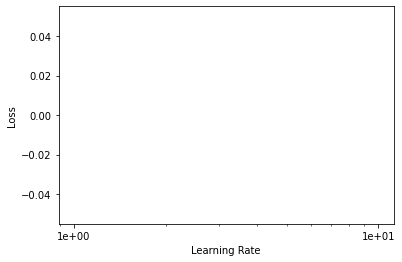

In [165]:
#Exploring the learning rates
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [166]:
#Fitting data and training the network
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time
0,1.918465,1.126885,0.984777,1.126886,0.603394,00:03
1,1.509914,1.073754,0.960468,1.073754,0.560677,00:03
2,1.241798,1.309638,1.051616,1.309639,0.585587,00:03
3,1.269880,1.109678,0.965459,1.109678,0.559659,00:03
4,1.024846,1.071551,0.950633,1.071551,0.551167,00:03
5,1.297750,1.166589,0.987191,1.166588,0.561066,00:03
6,1.116774,1.366096,1.037909,1.366096,0.568690,00:03
7,1.551893,1.394532,1.016783,1.394532,0.557185,00:03
8,1.577536,3.802831,1.431107,3.802830,0.623104,00:03
9,1.239783,2.081287,1.142943,2.081288,0.590107,00:03


In [167]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train, rows = 5)
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target,prediction
6,0.8775,1.2008,-0.4556,0.1430,0.1943,1.0273,0.9373,1.3350,0.5143,-0.0888,-0.4558,0.2857,-0.1593,-0.5844,0.30414382,[0.795287]
4,0.2044,-0.5368,-0.0842,-0.0238,-0.6931,-0.2706,-0.4563,-0.7794,-0.4858,-0.4269,0.0407,0.8047,-0.2611,-0.5163,2.047244,[0.883742]
11,2.6955,-0.2245,-1.1256,0.2952,-3.0000,-2.1948,-0.3811,-1.0408,0.4352,-0.4484,0.5226,0.4276,-0.2400,-0.4596,0.9310015,[0.80957]
2,-0.5400,0.3470,-0.1711,0.6969,-0.6336,-0.3133,-0.2042,0.2882,-0.5744,0.6111,-0.3351,-0.3297,-0.2425,0.4118,-0.058362514,[0.183748]
4,-0.6232,-0.0552,-0.6920,-0.4381,1.2637,-1.5986,0.0212,-0.4620,-0.0921,-0.0678,-0.5285,-0.8981,-0.2617,0.1869,-0.24695875,[0.013773]


month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target,prediction
4,0.0041,-0.0502,-0.3649,-0.0487,-0.1601,-0.3448,-0.3028,-0.3061,-0.2428,-0.1131,-0.0492,-0.2588,-0.1715,0.1398,0.2857143,[0.30618]
1,0.3438,-0.7068,0.1394,-0.0546,-0.5885,-1.6044,-1.4814,-0.9728,0.2094,0.1236,0.2788,-0.2619,-0.2593,0.1246,0.11725446,[0.244399]
4,-0.9881,-0.1295,0.1856,-0.2574,-0.0113,-0.2311,-0.6286,-0.0805,-0.4848,-0.2892,-0.3253,-0.0917,1.3233,1.5354,-0.23845008,[-0.420043]
11,-0.6121,0.2810,-0.2345,-1.1849,-2.2457,0.0404,-0.0793,1.0281,0.3000,-0.0463,-0.7757,-0.5808,-0.2556,-0.6666,-0.27598897,[0.144319]
4,-0.0040,-0.0038,-0.0131,-0.0218,-0.0378,-0.0521,-0.0587,-0.0639,-0.0425,-0.0237,0.0005,0.0209,-0.2494,-0.4058,0.4623772,[0.55875]


In [168]:
#Getting The Training And Validation Errors
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7ff5a00d0ea0>, <function mean_squared_error at 0x7ff5a00d0e18>, <function mean_absolute_error at 0x7ff5a00d0d90>]

The calculated RMSE & R-Squared For The Training Set : [tensor(1.4820), tensor(9.5888), tensor(0.6118)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(1.1997), tensor(2.6666), tensor(0.5828)]


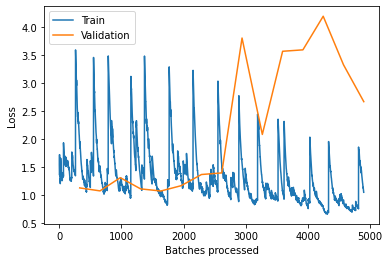

In [169]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()

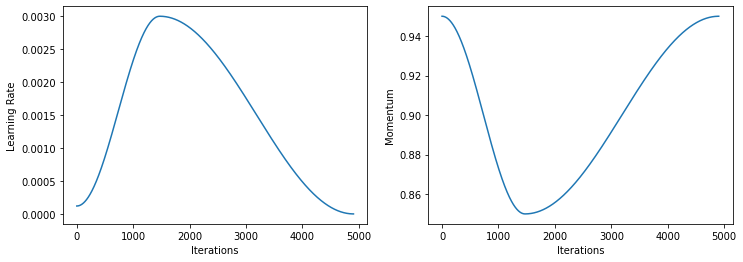

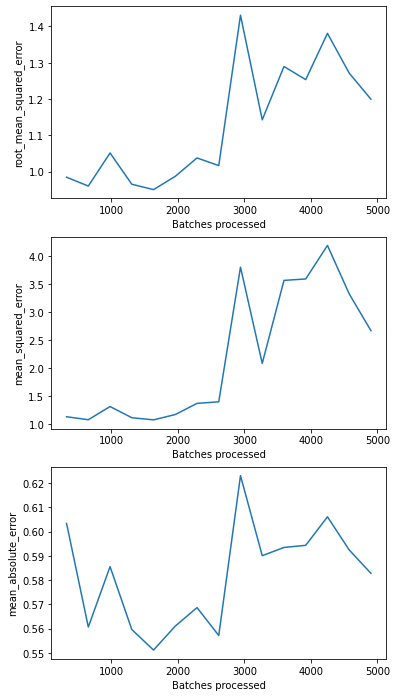

In [170]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [0]:
#Predicting For The Complete Test set
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['target'])
#Writing the predictions to an excel file.
#predictions.to_excel("Fast_ai_solution.xlsx", index = False)

https://analyticsindiamag.com/a-hands-on-guide-to-regression-with-fast-ai/

https://medium.com/analytics-vidhya/neural-networks-for-tabular-data-touching-the-untouched-efd66c950463

https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

### Test Model (recursive approach)

In [171]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [172]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

#### Take only Armenian values

In [0]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]
test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
#df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
current_gdp_armenia = new_df_current_us_gdp[new_df_current_us_gdp.index.str.contains('Armenia')]
constant_gdp_armenia = new_df_constant_gdp[new_df_constant_gdp.index.str.contains('Armenia')]

In [174]:
current_gdp_armenia

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.243309e+10,7.082519e+11


In [175]:
constant_gdp_armenia

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,1317.739791,1404.32009,1548.059613,1761.841234,2019.900532,2244.139398,2571.977128,2934.024882,3366.664939,3629.909091,3137.346098,3218.372707,3370.551103,3603.595848,3705.357396,3819.217787,3923.716502,3917.379676,4198.794749,4406.706434,9912.789467


### Testing ALL Models

In [0]:
def predict_value(conc, model):
  if model == 'lgb':
    return gbm.predict(np.array(conc).reshape(1, (len(conc))), num_iteration=gbm.best_iteration)
  if model == 'cgb':
    return cb_model.predict(conc)
  if model == 'xgb':
    return xgb_model.predict(conc)
  if model == 'nn':
    conc[12] = calendar.month_name[conc[12]]
    df_test = pd.DataFrame([conc], columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month', 'current us gdp', 'constant us gdp'])
    return learn.predict(df_test.iloc[0])[1].numpy()[0]
  if model == 'rf':
    return RForest.predict(np.array(conc).reshape(1, -1))

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
def calculate_model_result(model):

  df_errors = {'MSE': [], 'MAE': [], 'RMSE': []}

  len_train_df = len(train_df_armenia.columns)

  for i in range(len(test_df_armenia.columns)-6):
    
    true_values = np.array([])
    predicted_values = np.array([])

    for j in range(6):
      if i + j <= 12:
        if i + j < 12:
          arr1 = train_df_armenia[train_df_armenia.columns[-(12-i-j):]].values[0]
        else:
          arr1 = np.array([])
        arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr1, arr2, arr3), axis=0)
      else:
        arr2 = test_df_armenia[test_df_armenia.columns[i - (12 - j):i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr2, arr3), axis=0)

      month_col = test_df_armenia.columns[i+j]
      str_month = int(month_col[month_col.find('M') + 1:]) # calendar.month_name[]
      year = month_col[:month_col.find('M')]
      l = [str_month, current_gdp_armenia[str(int(year)-1)].values[0], constant_gdp_armenia[str(int(year)-1)].values[0]]
      conc = conc.tolist() + l
      y_pred = predict_value(conc, model)  #gbm.predict(np.array(conc).reshape(1, (len(conc))), num_iteration=gbm.best_iteration) #xgb_model.predict(conc) #cb_model.predict(conc)
      # print('pred', y_pred)
      true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      predicted_values = np.append(predicted_values, y_pred)

    df_errors['MSE'].append(mean_squared_error(true_values, predicted_values))
    df_errors['MAE'].append(mean_absolute_error(true_values, predicted_values))
    df_errors['RMSE'].append(np.sqrt(mean_squared_error(true_values, predicted_values)))

    return df_errors

In [200]:
from statistics import mean
model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf']
for model in model_list:
  df_errors = calculate_model_result(model)
  print('model', model, mean(df_errors['MSE']), mean(df_errors['RMSE']), mean(df_errors['MAE']))

model lgb 0.6583429657426486 0.8113833654584303 0.7550517791130451
model cgb 0.7026079300244988 0.8382171138938281 0.7351822834759686
model xgb 1.181944088727531 1.0871725202227709 0.9371326278661013
model nn 0.9520351858254497 0.9757229042230431 0.8407650377367258
model rf 0.6577653516965952 0.8110273433717233 0.7102887066685902


In [0]:
def calculate_arima():

  df_errors = {'MSE': [], 'MAE': [], 'RMSE': []}

  len_train_df = len(train_df_armenia.columns)

  for i in range(len(test_df_armenia.columns)-6):

    true_values = np.array([])
    predicted_values = np.array([])

    for j in range(6):
      arr1 = train_df_armenia[train_df_armenia.columns[-(len_train_df-i-j):]].values[0]
      arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]
      if j > 0:
        arr3 = predicted_values[-j:]
      else:
        arr3 = np.array([])
      
      conc = np.concatenate((arr1, arr2, arr3), axis=0)

      arima_model.fit(conc)
      y_pred = arima_model.predict(n_periods=1)

      true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      predicted_values = np.append(predicted_values, y_pred)

    df_errors['MSE'].append(mean_squared_error(true_values, predicted_values))
    df_errors['MAE'].append(mean_absolute_error(true_values, predicted_values))
    df_errors['RMSE'].append(np.sqrt(mean_squared_error(true_values, predicted_values)))

    return df_errors

In [181]:
df_errors = calculate_arima()
from statistics import mean
print('model', 'ARIMA', mean(df_errors['MSE']), mean(df_errors['RMSE']), mean(df_errors['MAE']))

model ARIMA 0.39759349169275043 0.6305501500219871 0.5530719852654885
